In [48]:
import random as rd
import numpy as np
import scipy as sp

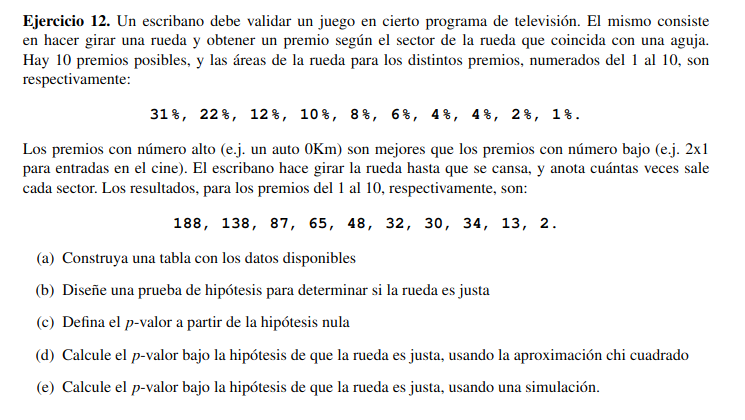

Para ver si la rueda es justa, debemos ver si los datos provienen de una variable aleatoria X con distribucion uniforme en {1,2,3,4,5,6,7,8,9,10} donde todos los numeros son equiprobbles.

En este caso todos los $p_i$ son iguales a 1/10.

| i | Ni | $p_i$ |
|---|----|-------|   
| 1 | 188 | 0.31 |
| 2 | 138 | 0.22 |
| 3 | 87 | 0.12 |
| 4 | 65 | 0.1 |
| 5 | 48 | 0.08 |
| 6 | 32 | 0.06 |
| 7 | 30 | 0.04 |
| 8 | 34 | 0.04 |
| 9 | 13 | 0.02 |
| 10 | 2 | 0.01 |
| Total | 637 | - |
--- ---- -------

$H_0$: La rueda es justa y los datos provienen de una variable X con una distribucion con las frecuencias descritas anteriormente.

En este caso la muestra es de tamaño $n=637$. Y el estadistico de prueba es:
$$
T = \sum_{i=1}^{10} \frac{(N_i - 637 \cdot p_i)^2}{637 \cdot p_i} = 9.8103
$$
Y el p-valor sera
$$
p = P(\chi^2_{9} > 9.810) = 0.37
$$

In [49]:
def estadistico(n, pi,Ni):
    t = 0
    for i in range(len(Ni)):
        t += ((Ni[i] - n*pi[i])**2)/(n*pi[i])
    return t

def calcular_pvalor_param(t, k, m):
    return 1 - sp.stats.chi2.cdf(t, k-1-m)

In [62]:
Ni = np.array([188, 138, 87, 65, 48, 32, 30, 34, 13, 2], dtype=float)
pi = [0.31, 0.22, 0.12, 0.10, 0.08, 0.06, 0.04, 0.04, 0.02, 0.01]

n = int(sum(Ni))
print("n: ", n)
print("k: ", len(Ni))
t = estadistico(n, pi, Ni)
pvalor = calcular_pvalor_param(t, len(Ni), 0)

print("Estadístico de prueba: ", t)
print("P-valor: ", pvalor)

n:  637
k:  10
Estadístico de prueba:  9.810370888711903
P-valor:  0.36605389988682613


In [51]:
def gen_x():
    u = rd.random()
    if u <= 0.31:
        return 0
    elif u <= 0.53:
        return 1
    elif u <= 0.65:
        return 2
    elif u <= 0.75:
        return 3
    elif u <= 0.83:
        return 4
    elif u <= 0.89:
        return 5
    elif u <= 0.93:
        return 6
    elif u <= 0.97:
        return 7
    elif u <= 0.99:
        return 8
    else:
        return 9

def gen_muestra(N):
    return [gen_x() for i in range(N)]

In [52]:
""" 
Simula el p-valor de la prueba de bondad de ajuste.

Parametros:
-----------
nsims : int
    Número de simulaciones a realizar.
n : int
    Tamaño de la muestra.
pi : list
    Lista de probabilidades de cada categoría.
Ni : list
    Lista de frecuencias observadas en cada categoría.
"""
def sim_p_valor(nsims, n, pi, Ni):
    t = estadistico(n, pi, Ni)
    pvalor = 0
    for i in range(nsims):
        muestra = gen_muestra(n)
        Ni_sim = np.unique(muestra, return_counts=True)[1]
        t1 = estadistico(n, pi, Ni_sim)
        if t1 >= t:
            pvalor += 1
        
    return pvalor/nsims

In [64]:
sim_p_valor(10000, n, pi, Ni)

0.3666